In [7]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [2]:
df = pd.read_csv("D:/downloads 2/news.csv")

# Basic preprocessing

In [3]:
df['text'] = df['text'].str.lower()

# Splitting

In [4]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TF-IDF Vectorization

In [8]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Model Training

In [9]:
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier()

# Prediction

In [10]:
y_pred = model.predict(X_test_tfidf)

# Evaluation

In [12]:
acc = metrics.accuracy_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred, pos_label='real')

print(f"Accuracy: {acc:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.67
F1 Score: 0.67


# Confusion Matrix

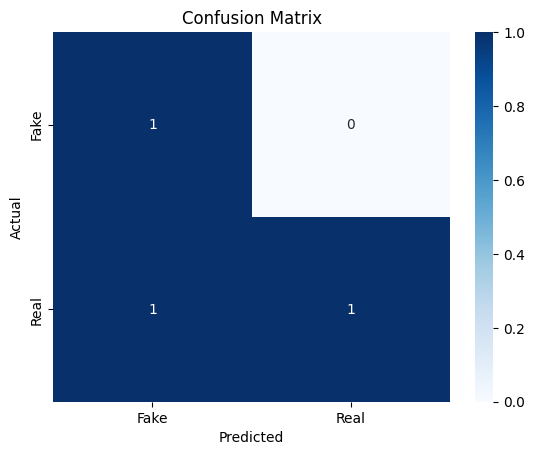

In [13]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=['fake', 'real'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()